This is a kaggle machine learning project. 
https://www.kaggle.com/c/titanic/overview

In [1]:
## Import library
import pandas as pd 
import numpy as np
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.model_selection import KFold

## Data Description

### Overview

The data has been split into two groups:

1. training set (train.csv)

2. test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.



### Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower


age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)


parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## Import data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Store our passenger ID for easy access
PassengerId = test['PassengerId']

In [5]:
# combine train and test dataset together
data = [train, test]
data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Categorical: Survived, Sex, Embarked. Ordinal: Pclass. 
Continous: Age, Fare. Discrete: SibSp, Parch

In [7]:
train.describe(include=['O']) # captial O not 0

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harris, Mr. Henry Birkhardt",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


1.Name is unique, has 891,

2.Sex has 577 males and 314 females,

3.Ticket feature has 681 unique, but has 210 (22%) duplicate values,

4.Cabin has several duplicates, several passengers shared a cabin,

5.Embarked has three values, S (644) used by most passengers.

In [8]:
train.info()
print('--'*30)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket 

In [9]:
# there are missing values in age, cabin and embarked.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How to deal with this missing values, we should consider whether they have a strong correlation with survive

## Analyze other features (Sex, Pclass, Embarked, Parch, SibSp) correlation with survive

In [10]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [11]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(
    by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index =False).mean().sort_values(
by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(
by ='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index =False).mean().sort_values(
by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(
by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Analyze by visualizing data

##### Age is important from the analysis

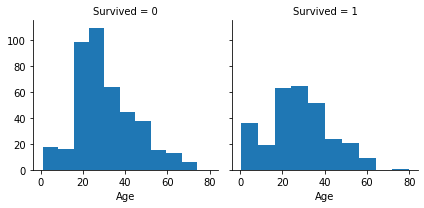

In [16]:
# Age with Survived
age = sns.FacetGrid(train, col='Survived')
age.map(plt.hist, 'Age')

##### Pclass is also an important feature

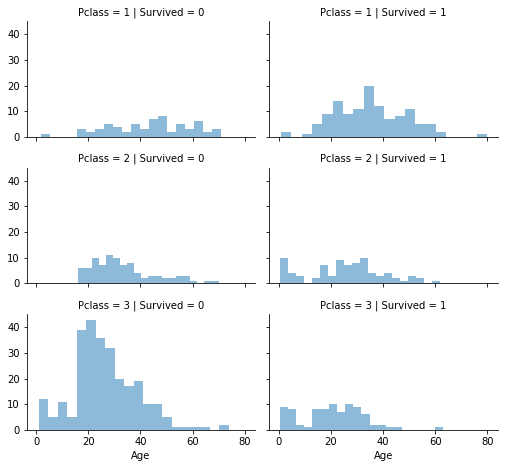

In [17]:
grid = sns.FacetGrid(train, col='Survived', row= 'Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

##### Have to keep Embarked

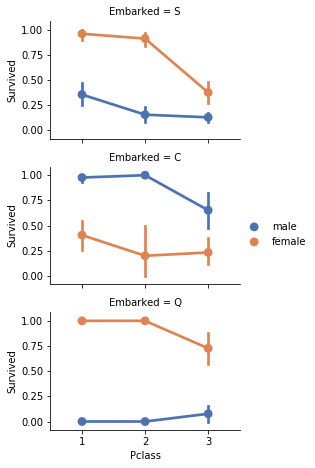

In [18]:
grid1 = sns.FacetGrid(train,row='Embarked', size=2.2, aspect=1.6)
grid1.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid1.add_legend()

In [19]:
##### Keep Fare featire, because higher fare had higher survival

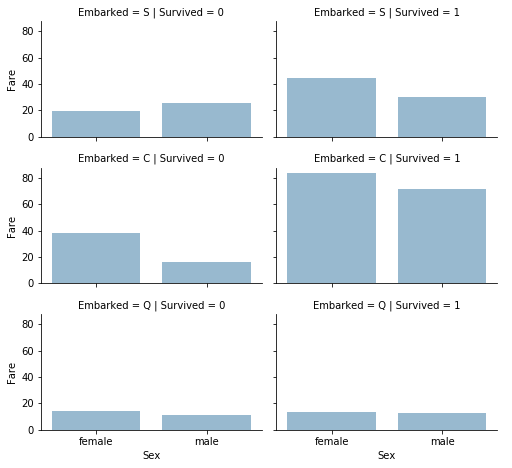

In [20]:
grid2 = sns.FacetGrid(train, row = 'Embarked', col='Survived', size =2.2, aspect=1.6)
grid2.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid2.add_legend()

## Wrangle data

##### We can drop PassengerId, Cabin and Ticket

In [21]:
print('Before', train.shape, test.shape, data[0].shape, data[1].shape)
train = train.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)
test = test.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)
data = [train, test]
print('After', train.shape, test.shape, data[0].shape, data[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 9) (418, 8) (891, 9) (418, 8)


#### Extract titles from Name, then test correlation between titles and survival

In [22]:
for name in data:
    name['Title'] = name.Name.str.extract('([A-Za-z]+)\.', expand = False)
    
pd.crosstab(train['Title'], train['Sex'])
    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


##### Replece many titles with a more common name depend on their sex or classify them as Rare

In [23]:
for name in data:
    name['Title'] = name['Title'].replace(['Lady', 'Capt', 'Col', 'Countess', 'Don', 
                                           'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Rare')
    
    name['Title'] = name['Title'].replace(['Mlle', 'Ms'], 'Miss')
    name['Title'] = name['Title'].replace(['Mme'], 'Mrs')

##### Title is an important feature

In [24]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [26]:
# drop name
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)
data = [train, test]
train.shape, test.shape

((891, 9), (418, 8))

#### Coverting categorical features to numerical values, Title, Sex, Embarked

In [27]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [28]:
# there is two missing values in Embarked, we can fill them with the most common occurance
freq = train.Embarked.dropna().mode()[0]
freq

'S'

In [29]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq)

In [30]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
    
    dataset['Title'] = dataset['Title'].map({'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5})
    dataset['Title'] = dataset['Title'].fillna(0)
    
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


##### There is correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender =0, Pclass=1 and Gender =1, and so on...

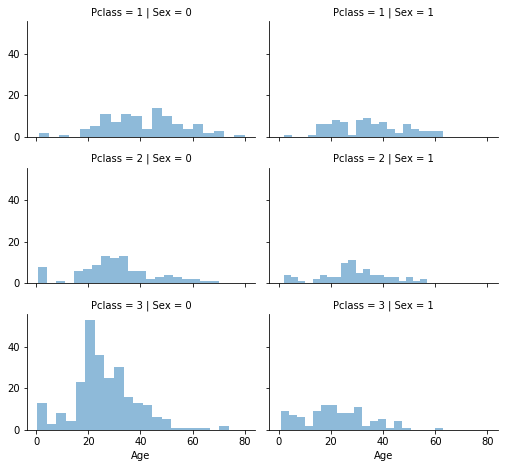

In [31]:
grid3 = sns.FacetGrid(train, row = 'Pclass', col ='Sex', size = 2.2, aspect = 1.6)
grid3.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid3.add_legend()

In [32]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
# Now we iterate over Sex(0 or 1) and Pclass(1, 2, 3) to calculate guessed values of Age for the six combinations
for dataset in data:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & 
                              (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            #age_mean = guess_df.mean()
            #age_std = guess_df.std()
            #age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            
            # Convert random age float to nearest 0.5 age
            guess_ages[i, j] = int(age_guess/0.5 + 0.5)*0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i)
                        & (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,3
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,3
4,0,3,0,35,0,0,8.0500,0,1


In [34]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [35]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(
    by='AgeBand', ascending = True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [36]:
for dataset in data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] >64, 'Age'] = 4
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,1,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,0,1,"(32.0, 48.0]"


In [37]:
train = train.drop(['AgeBand'], axis = 1)
data = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


In [38]:
# Combine SibSp and Parch together as FamilySize
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean(
).sort_values(by = 'Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [39]:
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [40]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,0,1,2,0
1,1,1,1,2,1,0,71.2833,1,3,2,0
2,1,3,1,1,0,0,7.9250,0,2,1,1
3,1,1,1,2,1,0,53.1000,0,3,2,0
4,0,3,0,2,0,0,8.0500,0,1,1,1


In [41]:
# drop SibSp, Parch and FamilySize
train = train.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
test = test.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
data = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [42]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        1
Embarked    0
Title       0
IsAlone     0
dtype: int64

In [43]:
## There is one missing value of Fare in test dataset, using median to fill this missing value
test['Fare'].fillna(test['Fare'].dropna().median(), inplace = True)
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,2,7.8292,2,1.0,1
1,3,1,2,7.0000,0,3.0,0
2,2,0,3,9.6875,2,1.0,1
3,3,0,1,8.6625,0,1.0,1
4,3,1,1,12.2875,0,3.0,0


In [44]:
# covert the Fare feature to ordinal values
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] >7.91 ) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [45]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,2,0,2,1.0,1
1,3,1,2,0,0,3.0,0
2,2,0,3,1,2,1.0,1
3,3,0,1,1,0,1.0,1
4,3,1,1,1,0,3.0,0


#### There are not too many features strongly correlated with one another from the Pearson Correlation plot

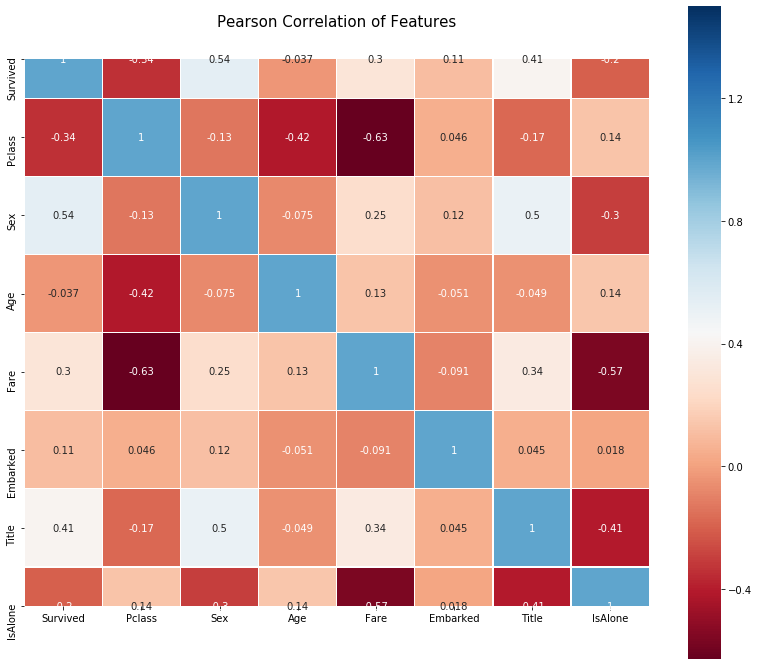

In [46]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y = 1.05, size=15)
sns.heatmap(train.astype(float).corr(), linewidths=0.2, vmax=1.5,
           square=True, cmap=colormap, linecolor = 'white', annot=True)

#### Pairplts to abserve the distribution of data from one feature to the other.

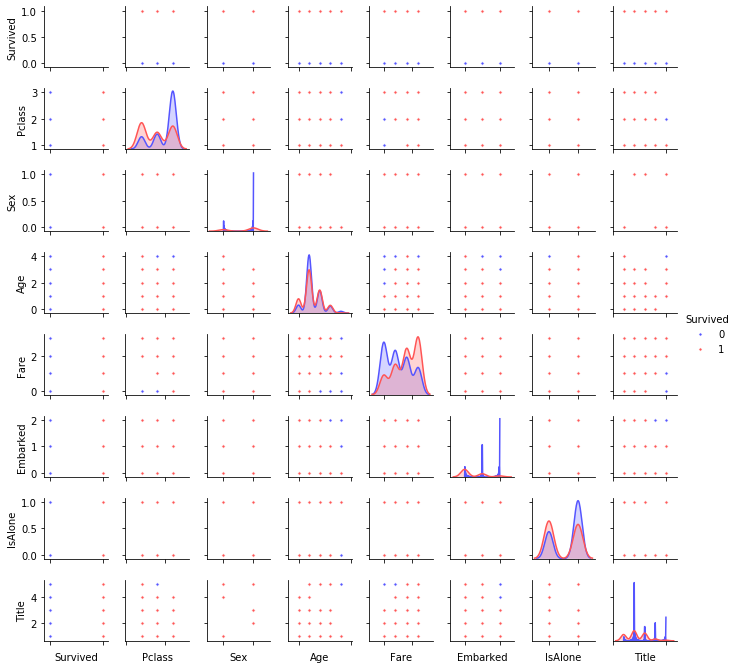

In [47]:
g = sns.pairplot(train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare',
                      u'Embarked', u'IsAlone', u'Title']], hue='Survived', 
                 palette = 'seismic', size=1.2, diag_kind ='kde', 
                 diag_kws=dict(shade=True), plot_kws=dict(s=10))
g.set(xticklabels=[])

## Split dataset

In [48]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.copy()
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [49]:
# Logistic regression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_predict = logistic.predict(X_test)
accuracy_log = round(logistic.score(X_train, y_train)*100, 2)
accuracy_log

81.37

In [50]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff['Correlation'] = pd.Series(logistic.coef_[0])

coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.193429
5,Title,0.408985
4,Embarked,0.282289
6,IsAlone,0.185954
3,Fare,-0.065545
2,Age,-0.564966
0,Pclass,-1.262582


In [51]:
# Support vector machine

svc = SVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
accuracy_svc = round(svc.score(X_train, y_train)*100, 2)
accuracy_svc

83.28

In [52]:
# k-Nearest Neighbors (k-NN)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
accuracy_knn = round(knn.score(X_train, y_train)*100, 2)
accuracy_knn

84.62

In [53]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_predict = gaussian.predict(X_test)
accuracy_gaussian = round(gaussian.score(X_train, y_train)*100, 2)
accuracy_gaussian

77.33

In [54]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_predict = perceptron.predict(X_test)
accuracy_perceptron = round(perceptron.score(X_train, y_train)*100, 2)
accuracy_perceptron

78.34

In [55]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_predict = linear_svc.predict(X_test)
accuracy_linear = round(linear_svc.score(X_train, y_train)*100, 2)
accuracy_linear

80.02

In [56]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_predict = sgd.predict(X_test)
accuracy_sgd = round(sgd.score(X_train, y_train)*100, 2)
accuracy_sgd

74.3

In [57]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)
accuracy_tree = round(decision_tree.score(X_train, y_train)*100, 2)
accuracy_tree

86.64

In [58]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
accuracy_rf = round(rf.score(X_train, y_train)*100, 2)
accuracy_rf

86.64

### Model evaluation

In [59]:
models = pd.DataFrame({
    'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score':[accuracy_svc, accuracy_knn, accuracy_log, 
              accuracy_rf, accuracy_gaussian, accuracy_perceptron, 
              accuracy_sgd, accuracy_linear, accuracy_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.62
0,Support Vector Machines,83.28
2,Logistic Regression,81.37
7,Linear SVC,80.02
5,Perceptron,78.34
4,Naive Bayes,77.33
6,Stochastic Gradient Decent,74.30


In [60]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,2,0,2,1.0,1
1,3,1,2,0,0,3.0,0
2,2,0,3,1,2,1.0,1
3,3,0,1,1,0,1.0,1
4,3,1,1,1,0,3.0,0


In [61]:
submission = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived':y_predict
})

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Below, credit for https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

In [119]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_splits = NFOLDS, random_state = SEED, shuffle=False)

In [120]:
# credit for https://www.kaggle.com/learn-forum/123664, for helping me solve this error:KFold' is not iterable  
print(type(kf))
print(type(kf.split(train)))
print(type(enumerate(kf.split(train))))

<class 'sklearn.model_selection._split.KFold'>
<class 'generator'>
<class 'enumerate'>


Bear with me for those who already know this but for people who have not created classes or objects in Python before, let me explain what the code given above does. In creating my base classifiers, I will only use the models already present in the Sklearn library and therefore only extend the class for that.

def init : Python standard for invoking the default constructor for the class. This means that when you want to create an object (classifier), you have to give it the parameters of clf (what sklearn classifier you want), seed (random seed) and params (parameters for the classifiers).

The rest of the code are simply methods of the class which simply call the corresponding methods already existing within the sklearn classifiers. Essentially, we have created a wrapper class to extend the various Sklearn classifiers so that this should help us reduce having to write the same code over and over when we implement multiple learners to our stacker.

In [139]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)
        
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self, x, y):
        return self.clf.fit(x, y)
    
    def feature_importances(self, x, y):
        print(self.clf.fit(x, y).feature_importances_)   

Out-of-Fold Predictions

Now as alluded to above in the introductory section, stacking uses predictions of base classifiers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. This runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.

In [140]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    for i, (train_index, test_index) in enumerate(kf.split(train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.train(x_tr, y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

Generating our Base First-Level Models

So now let us prepare five learning models as our first level classification. These models can all be conveniently invoked via the Sklearn library and are listed as follows:

Random Forest classifier
Extra Trees classifier
AdaBoost classifer
Gradient Boosting classifer
Support Vector Machine

Parameters

Just a quick summary of the parameters that we will be listing here for completeness,

n_jobs : Number of cores used for the training process. If set to -1, all cores are used.

n_estimators : Number of classification trees in your learning model ( set to 10 per default)

max_depth : Maximum depth of tree, or how much a node should be expanded. Beware if set to too high a number would run the risk of overfitting as one would be growing the tree too deep

verbose : Controls whether you want to output any text during the learning process. A value of 0 suppresses all text while a value of 3 outputs the tree learning process at every iteration.

Please check out the full description via the official Sklearn website. There you will find that there are a whole host of other useful parameters that you can play around with.

In [141]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs':-1,
    'n_estimators':500,
    'warm_start':True,
    #'max_features':0.2,
    'max_depth':6,
    'min_samples_leaf':2,
    'max_features':'sqrt',
    'verbose':0
}

In [142]:
# Extra Trees Parameters
et_params = {
    'n_jobs':-1,
    'n_estimators':500,
    #'max_features':0.2,
    'max_depth':8,
    'min_samples_leaf':2,
    'verbose':0
}

In [143]:
# DecisionTree parameters
dtree_params = {
    'max_depth': 6,
    'max_features':'sqrt'
}

In [144]:
# AdaBoost Parameters
ada_params = {
    'n_estimators':500,
    'learning_rate':0.75
}

In [145]:
# Gradient Boosting parameters
gb_params = {
    'n_estimators':500,
    #'max_features':0.2,
    'max_depth':5,
    'min_samples_leaf':2,
    'verbose':0
}

In [146]:
# Support Vector Classifier parameters
svc_params = {
    'kernel':'linear',
    'C':0.025
}

In [147]:
# Logistic Regression parameters
log_params ={
    'n_jobs':-1,
    'max_iter':100,
    'verbose':0,
    'warm_start':True
}

In [148]:
# KNeighbors Classifier parameters
kn_params = {
    'n_neighbors':5,
    'n_jobs':-1
}

In [149]:
# Naive bayes parameters
nb_params = {
    'var_smoothing': 1e-9
}

In [150]:
# Perceptron parameters
perceptron_params = {
    'warm_start':True,
    'max_iter': 1000,
    'n_jobs': -1
}

In [151]:
# stochastic gradient descent (SGD) parameters
sgd_params = {
    'verbose':0,
    'n_jobs': -1,
    'warm_start':True
}

In [152]:
# Create 11 objects that represent our 11 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)
dtree = SklearnHelper(clf=DecisionTreeClassifier, seed=SEED, params = dtree_params)
log = SklearnHelper(clf=LogisticRegression, seed=SEED, params = log_params)
#kn = SklearnHelper(clf=KNeighborsClassifier, seed=SEED, params = kn_params) # because there is no random_state in this method, same to naive bayes
perceptron = SklearnHelper(clf =Perceptron, seed=SEED, params = perceptron_params)
#nb = SklearnHelper(clf = GaussianNB, seed=SEED, params = nb_params)
sgd = SklearnHelper(clf =SGDClassifier, seed=SEED, params = sgd_params)

In [153]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
x_train = train.values
x_test = test.values

Output of the First level Predictions

We now feed the training and test data into our 9 base classifiers and use the Out-of-Fold prediction function we defined earlier to generate our first level predictions. Allow a handful of minutes for the chunk of code below to run.

In [154]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier
dtree_oof_train, dtree_oof_test = get_oof(dtree, x_train, y_train, x_test) # Decision tree
log_oof_train, log_oof_test = get_oof(log, x_train, y_train, x_test) # logistic regression
perceptron_oof_train, perceptron_oof_test = get_oof(perceptron, x_train, y_train, x_test) # perceptron
sgd_oof_train, sgd_oof_test = get_oof(sgd, x_train, y_train, x_test) # stochastic gradient descent  

print("Training is complete")

ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 7 

In [158]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)
dtree_feature = dtree.feature_importances(x_train, y_train)
# log_featrure = log.feature_importances(x_train, y_train) #'LogisticRegression' object has no attribute 'feature_importances_'
# perceptron = perceptron.feature_importances(x_train, y_train) #'Perceptron' object has no attribute 'feature_importances_'
#sgd = sgd.feature_importances(x_train, y_train) #'SGDClassifier' object has no attribute 'feature_importances_'

[0.69133919 0.05251876 0.10956663 0.01057965 0.02158981 0.00810648
 0.09804708 0.00825241]
[0.75254742 0.0443734  0.11483715 0.00519726 0.01695071 0.00554759
 0.05192157 0.00862491]
[1. 0. 0. 0. 0. 0. 0. 0.]
[1.00000000e+00 3.28632535e-15 1.04164715e-15 7.25797997e-16
 2.35571861e-15 1.98488479e-16 2.32302050e-15 5.95031364e-16]
[6.37459084e-01 1.09976641e-01 6.45912183e-02 2.20994296e-02
 3.16516866e-02 8.43770386e-04 1.33357324e-01 2.08470613e-05]


In [160]:
rf_features = [0.69133919, 0.05251876, 0.10956663, 0.01057965, 0.02158981, 0.00810648,
 0.09804708, 0.00825241]
et_features = [0.75254742, 0.0443734,  0.11483715, 0.00519726, 0.01695071, 0.00554759,
 0.05192157, 0.00862491]
ada_features = [1., 0., 0., 0., 0., 0., 0., 0.]
gb_features =[1.00000000e+00, 3.28632535e-15, 1.04164715e-15, 7.25797997e-16,
 2.35571861e-15, 1.98488479e-16, 2.32302050e-15, 5.95031364e-16]
dtree_features =[6.37459084e-01, 1.09976641e-01, 6.45912183e-02, 2.20994296e-02,
 3.16516866e-02, 8.43770386e-04, 1.33357324e-01, 2.08470613e-05]


In [162]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features,
    'Decision Trees feature importances': dtree_features
    })
feature_dataframe

,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importances,Decision Trees feature importances
0,Survived,0.691339,0.752547,1.0,1.000000e+00,0.637459
1,Pclass,0.052519,0.044373,0.0,3.286325e-15,0.109977
2,Sex,0.109567,0.114837,0.0,1.041647e-15,0.064591
3,Age,0.010580,0.005197,0.0,7.257980e-16,0.022099
4,Fare,0.021590,0.016951,0.0,2.355719e-15,0.031652
5,Embarked,0.008106,0.005548,0.0,1.984885e-16,0.000844
6,Title,0.098047,0.051922,0.0,2.323020e-15,0.133357
7,IsAlone,0.008252,0.008625,0.0,5.950314e-16,0.000021


In [173]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        #size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [174]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [166]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [167]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [168]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Decision Trees feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Decision Trees feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Decision Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [170]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) 
# axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importances,Decision Trees feature importances,mean
0,Survived,0.691339,0.752547,1.0,1.000000e+00,0.637459,0.816269
1,Pclass,0.052519,0.044373,0.0,3.286325e-15,0.109977,0.041374
2,Sex,0.109567,0.114837,0.0,1.041647e-15,0.064591,0.057799


In [171]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')
